In [157]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import nbinom
import pandas as pd

# Poultry Distribution Visualisation

In [200]:
rv_chickens = nbinom(0.1018,0.00001719)
rv_ducks = nbinom(0.03011,0.0003591)
rv_birds = nbinom(0.1487,0.00002127)

In [262]:
x = np.logspace(0,7,num =50, base = 10)
y_chickens = np.array([rv_chickens.cdf(j) for j in x])
y_ducks = np.array([rv_ducks.cdf(j) for j in x])
y_birds = np.array([rv_birds.cdf(j) for j in x])

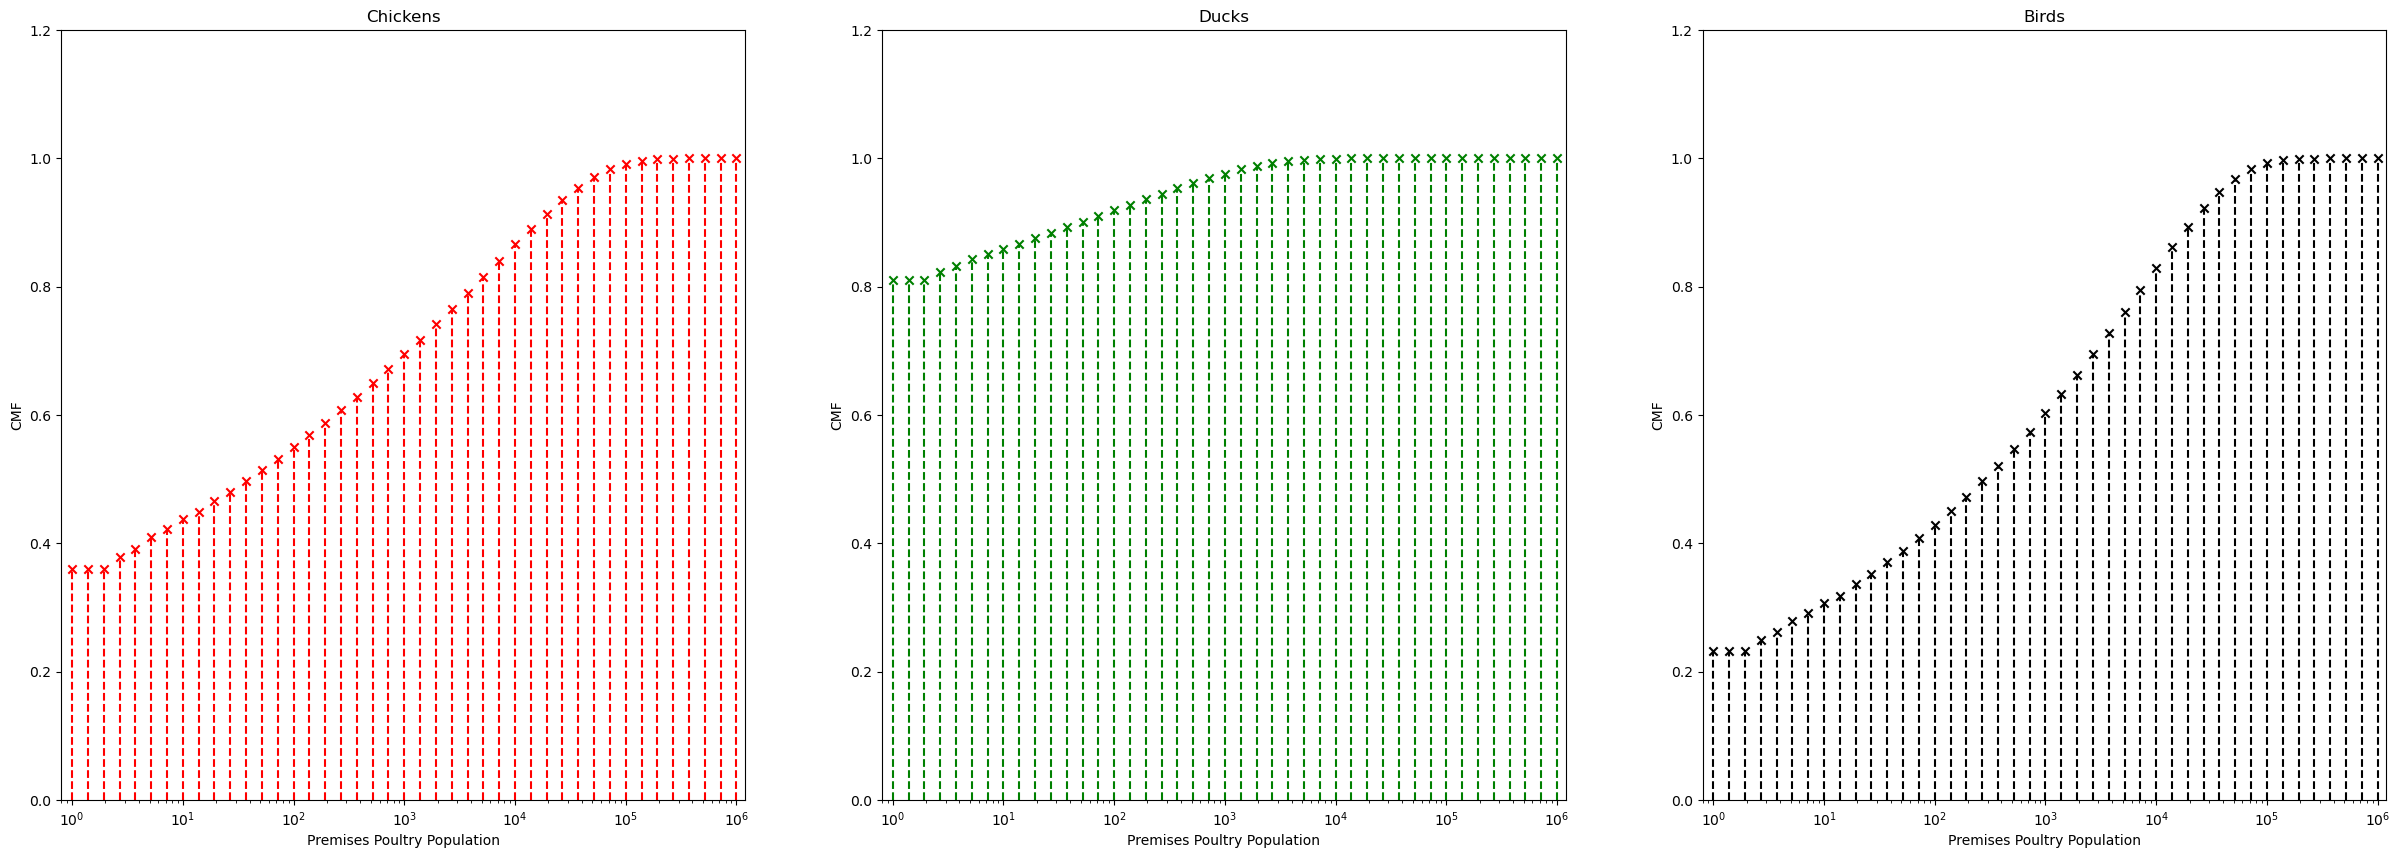

In [265]:
fig,ax = plt.subplots(1,3, figsize = (30,10))

col = ["red","green","black"]
labels = ["Chickens", "Ducks", "Birds"]
y = [y_chickens ,y_ducks,y_birds]




for i in range(3):
    ax[i].set_xscale('log')
    ax[i].set_xlabel("Premises Poultry Population") 
    ax[i].set_ylabel("CMF")
    ax[i].set_xlim(0.8,1200000)
    ax[i].set_ylim(0,1.2)
    ax[i].vlines(x,np.zeros(len(x)),y[i],color = col[i], linestyles = "dashed")
    ax[i].scatter(x,y[i],color = col[i], label = labels[i], marker = "x")
    ax[i].set_title(labels[i])

plt.show()

# Graph Sandbox

In [ ]:
class premise:
    def __init__(self,chicken_n):
        self.chicken_n = chicken_n

        

In [57]:
def generate_nw_grid(m,n):
    base = nx.grid_2d_graph(m,n)
    
    chicken_numbers = np.random.negative_binomial(0.1018,0.00001719,m*n)
    D = {}
    i = 0
    for node in base.nodes():
        D[node] = premise(chicken_numbers[i])
        i+=1
        
    G = nx.Graph()
    G.add_edges_from([(D[e[0]],D[e[1]]) for e in base.edges()])   
    return G

In [148]:
def generate_premises_power_law(n,p):
    deg_seq = nx.utils.powerlaw_sequence(n,p) 
    for i in range(len(deg_seq)):
        deg_seq[i] = round(deg_seq[i])
    deg_seq = sorted(deg_seq,reverse = True)
    if sum(deg_seq)%2 !=0:
        deg_seq[-1] +=1

    
    base = nx.configuration_model(deg_seq)
    
    D = {}
    chicken_numbers = sorted(np.random.negative_binomial(0.1018,0.00001719,n))
    
    
    i = 0
    for node in sorted(base.nodes(), key = lambda x: base.degree[x]):
        D[node] = premise(chicken_numbers[i])
        i+=1
    G = nx.Graph()
    G.add_edges_from([(D[e[0]],D[e[1]]) for e in base.edges()])  
    G.remove_edges_from(nx.selfloop_edges(G))
    return G
    

In [126]:
def add_chicken_weights(G):
    values = {}
    for n in G1.nodes():
        values[n] = {"chicken_n":n.chicken_n}

    nx.set_node_attributes(G, values)
    return G

## Grid

In [266]:
G = generate_nw_grid(10,10)
add_chicken_weights(G)
nx.write_gexf(G, "test.gexf")

![title](chicken_grid_test.png)

## Power law

In [268]:
G_power = generate_premises_power_law(100,2)
add_chicken_weights(G_power)
nx.write_gexf(G_power, "test_power_2.gexf")

A | B
- | - 
![alt](chicken_power2.5_test.png) | ![alt](chicken_power2.5_test2.png)